In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from erltrees.evo.evo_tree import Individual

ModuleNotFoundError: No module named 'erltrees'

In [ ]:
tree_str = """- istage <= -0.66667
-- -0.9995175973967536
-- istage <= -0.44444
--- -0.8605915760993957
--- -0.9999794198152064"""
Individual.read_from_string(tree_str)

In [10]:
!pip install -e ../erltrees

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/vgarcia/Documents/GitHub/erltrees
  Preparing metadata (setup.py) ... done
  Attempting uninstall: erltrees
    Found existing installation: erltrees 0.1
    Not uninstalling erltrees at /home/vgarcia/Documents/GitHub/erltrees, outside environment /opt/gym_dssat_pdi
    Can't uninstall 'erltrees'. No files were found to uninstall.
  Running setup.py develop for erltrees

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [28]:
with open('output/fertilization/histories_20230623-164044.pkl', 'rb') as f:
    data = pickle.load(f)

In [26]:
data.keys()

dict_keys(['null', 'expert', 'ppo', 'tree'])

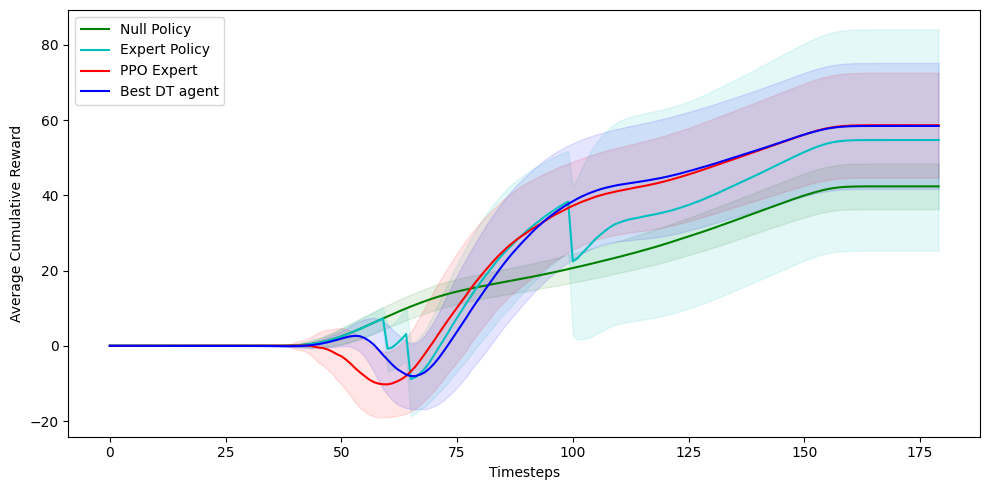

In [75]:
agent_names = {
    "null": "Null Policy",
    "expert": "Expert Policy",
    "ppo": "PPO Expert",
    "tree": "Best DT agent"
}

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

plt.subplots(figsize=(10, 5))
for i, key in enumerate(["null", "expert", "ppo", "tree"]):
    R = data[key]['rewards']
    rewards = np.array([np.pad(r[:-1], pad_width=(0, 180 - len(r[:-1])), constant_values=0) for r in R])
    cum_rewards = np.cumsum(rewards, axis=1)
    mean_rewards = np.mean(cum_rewards, axis=0)
    std_rewards = np.std(cum_rewards, axis=0)
    plt.plot(range(180), mean_rewards, label=agent_names[key], color="gcrb"[i])
    plt.fill_between(range(180), mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.1, color="gcrb"[i])
plt.legend(loc="upper left")
plt.xlabel("Timesteps")
plt.ylabel("Average Cumulative Reward")
plt.tight_layout()
plt.savefig("output/fertilization/rewards.png")